<a href="https://colab.research.google.com/github/silvya-github/silvya-github/blob/main/EDA_Production_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data preprocessing - EDA

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the data

In [ ]:
#csv path and read
df = pd.read_csv('/content/drive/MyDrive/production_data_train.csv')

In [ ]:
#print the dataset
df

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn,_LastUpdate
0,33053063590000,2015,3,17186,26624,1.549168,8213,0.477889,16,2016-08-11 14:03:14.000
1,33053063590000,2015,4,18796,21796,1.159608,7255,0.385986,30,2016-08-11 14:03:14.000
2,33053063590000,2015,5,14626,15988,1.093122,4213,0.288049,31,2016-08-11 14:03:14.000
3,33053063590000,2015,6,10421,12311,1.181365,2717,0.260724,30,2016-04-06 13:47:11.383
4,33053063590000,2015,7,9777,11254,1.151069,2399,0.245372,31,2016-04-06 13:47:11.383
...,...,...,...,...,...,...,...,...,...,...
394069,42301324920100,2018,5,2387,10603,4.441977,21452,8.987013,0,2019-03-10 13:58:15.553
394070,42301324920100,2018,6,4531,8700,1.920106,40840,9.013463,0,2019-03-10 13:58:15.553
394071,42301324920100,2018,7,7432,9536,1.283100,66864,8.996771,0,2019-03-10 13:58:15.553
394072,42301324920100,2018,8,4614,8625,1.869311,41465,8.986779,0,2019-03-10 13:58:15.553


In [ ]:
df.shape

(394074, 10)

Basic Exploratory Data Analysis

In [ ]:
#Prints column header 
df.columns

Index(['API', 'Year', 'Month', 'Liquid', 'Gas', 'RatioGasOil', 'Water',
       'PercentWater', 'DaysOn', '_LastUpdate'],
      dtype='object')

**Explanations about the columns**

*   **API:** specifies the unique Well number
*   **Year, Month:** Specifies the year and month which the hydrocarbons produced
*   **Liquid, Gas, Water:** The amount of oil, gas and water produced from the well
*   **RatioGasOil:** Measure of volume of gas produced along with  oil
*   **PercentWater:** Water produced per liquid production in the well
*   **DaysOn:** No of days of hydrocarbon production in the well
*   **_LastUpdate:** Date and time of last updation of data of the specific well

In [ ]:
#prints first 5 rows of the database
df.head()

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn,_LastUpdate
0,33053063590000,2015,3,17186,26624,1.549168,8213,0.477889,16,2016-08-11 14:03:14.000
1,33053063590000,2015,4,18796,21796,1.159608,7255,0.385986,30,2016-08-11 14:03:14.000
2,33053063590000,2015,5,14626,15988,1.093122,4213,0.288049,31,2016-08-11 14:03:14.000
3,33053063590000,2015,6,10421,12311,1.181365,2717,0.260724,30,2016-04-06 13:47:11.383
4,33053063590000,2015,7,9777,11254,1.151069,2399,0.245372,31,2016-04-06 13:47:11.383


In [ ]:
#prints last 5 rows of the database
df.tail()

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn,_LastUpdate
394069,42301324920100,2018,5,2387,10603,4.441977,21452,8.987013,0,2019-03-10 13:58:15.553
394070,42301324920100,2018,6,4531,8700,1.920106,40840,9.013463,0,2019-03-10 13:58:15.553
394071,42301324920100,2018,7,7432,9536,1.283100,66864,8.996771,0,2019-03-10 13:58:15.553
394072,42301324920100,2018,8,4614,8625,1.869311,41465,8.986779,0,2019-03-10 13:58:15.553
394073,42301324920100,2018,9,2156,3354,1.555659,19285,8.944805,0,2019-03-10 13:58:15.553


In [ ]:
##Basic statistics of numerical data (count, mean, minimum, maximum etc)
df.describe()

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn
count,3.940740e+05,394074.000000,394074.000000,394074.000000,394074.000000,394074.000000,3.940740e+05,394074.000000,394074.000000
mean,3.060603e+13,2016.297221,6.683620,3058.839477,10345.621449,21.223017,4.436955e+03,2.381140,16.918008
std,1.330614e+13,1.761555,3.448168,3823.349212,15535.037753,822.474584,1.063366e+04,61.958723,14.473768
min,5.001098e+12,1977.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,3.002541e+13,2015.000000,4.000000,891.000000,2427.000000,1.206981,3.200000e+02,0.252230,0.000000
50%,3.306103e+13,2016.000000,7.000000,1848.000000,5591.000000,2.458482,1.639000e+03,0.859604,27.000000
75%,4.223535e+13,2017.000000,10.000000,3640.000000,12346.000000,5.942927,4.404000e+03,1.922737,31.000000
max,4.902123e+13,2019.000000,12.000000,115876.000000,396506.000000,178095.000000,1.451478e+06,31860.000000,31.000000


In [ ]:
#Identify the rows and columns and datatype and memory storage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394074 entries, 0 to 394073
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   API           394074 non-null  int64  
 1   Year          394074 non-null  int64  
 2   Month         394074 non-null  int64  
 3   Liquid        394074 non-null  int64  
 4   Gas           394074 non-null  int64  
 5   RatioGasOil   394074 non-null  float64
 6   Water         394074 non-null  int64  
 7   PercentWater  394074 non-null  float64
 8   DaysOn        394074 non-null  int64  
 9   _LastUpdate   394074 non-null  object 
dtypes: float64(2), int64(7), object(1)
memory usage: 30.1+ MB


In [ ]:
#Check for null values
df.isnull().sum()

API             0
Year            0
Month           0
Liquid          0
Gas             0
RatioGasOil     0
Water           0
PercentWater    0
DaysOn          0
_LastUpdate     0
dtype: int64

In [ ]:
#Check for duplicated rows
df[df.duplicated()]

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn,_LastUpdate


In [ ]:
#Get the no of unique values in each column
df.nunique()

API               7844
Year                43
Month               12
Liquid           20469
Gas              48462
RatioGasOil     365934
Water            32161
PercentWater    321440
DaysOn              32
_LastUpdate     195033
dtype: int64

In [ ]:
df.API.nunique()

7844

In [ ]:
#Get the unique values in the column "Year"
df['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2014, 2013, 2008, 2009, 2010, 2011,
       2012, 2007, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 1977, 1978, 1979, 1980])

In [ ]:
#Remove the columns "_LastUpdate" and "DaysOn"
drop_df = df.drop(['_LastUpdate'], axis=1)
drop_df

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn
0,33053063590000,2015,3,17186,26624,1.549168,8213,0.477889,16
1,33053063590000,2015,4,18796,21796,1.159608,7255,0.385986,30
2,33053063590000,2015,5,14626,15988,1.093122,4213,0.288049,31
3,33053063590000,2015,6,10421,12311,1.181365,2717,0.260724,30
4,33053063590000,2015,7,9777,11254,1.151069,2399,0.245372,31
...,...,...,...,...,...,...,...,...,...
394069,42301324920100,2018,5,2387,10603,4.441977,21452,8.987013,0
394070,42301324920100,2018,6,4531,8700,1.920106,40840,9.013463,0
394071,42301324920100,2018,7,7432,9536,1.283100,66864,8.996771,0
394072,42301324920100,2018,8,4614,8625,1.869311,41465,8.986779,0


##Analysis and Visualization

In [ ]:
#Calculating total Oil, gas and water produced from the Raisa Well
Total_oil = df.Liquid.sum()
Total_gas = df.Gas.sum()
Total_water = df.Water.sum()

Total_production = Total_oil + Total_gas + Total_water

In [ ]:
print(f"The total oil produced is {Total_oil} cubic metres")
print(f"The total gas produced is  {Total_gas} cubic metres")
print(f"The total water produced is {Total_water} cubic metres")

The total oil produced is 1205409108 cubic metres
The total gas produced is  4076940427 cubic metres
The total water produced is 1748488645 cubic metres


In [ ]:
#Plotting pie chart using Plotly library px.pie
values = [Total_oil, Total_gas, Total_water]
labels = ['Oil', 'Gas', 'Water']

fig = px.pie(values=values, names=labels, labels=labels, color=labels, color_discrete_map={'Oil':'purple', 'Gas':'lime', 'Water':'blue'},title= "Fluid Production Fraction")
fig.update_layout(font_size = 14)

In [ ]:
import calendar

abbrevations = dict(enumerate(calendar.month_abbr))
drop_df['Month']=drop_df['Month'].map(abbrevations)


In [ ]:
drop_df['Month']= pd.Categorical(drop_df['Month'], categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)

drop_df

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn
0,33053063590000,2015,NaN,17186,26624,1.549168,8213,0.477889,16
1,33053063590000,2015,NaN,18796,21796,1.159608,7255,0.385986,30
2,33053063590000,2015,NaN,14626,15988,1.093122,4213,0.288049,31
3,33053063590000,2015,NaN,10421,12311,1.181365,2717,0.260724,30
4,33053063590000,2015,NaN,9777,11254,1.151069,2399,0.245372,31
...,...,...,...,...,...,...,...,...,...
394069,42301324920100,2018,NaN,2387,10603,4.441977,21452,8.987013,0
394070,42301324920100,2018,NaN,4531,8700,1.920106,40840,9.013463,0
394071,42301324920100,2018,NaN,7432,9536,1.283100,66864,8.996771,0
394072,42301324920100,2018,NaN,4614,8625,1.869311,41465,8.986779,0


In [ ]:
#Sort the dataframe by column name "Year" then by "Month" in ascending order
Sort= drop_df.sort_values(["Year", "Month"])

Sort

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn
379202,42371323150300,1977,NaN,21711,1213,0.055870,0,0.000000,0
379203,42371323150300,1977,NaN,18744,1174,0.062633,0,0.000000,0
379204,42371323150300,1977,NaN,17224,1164,0.067580,0,0.000000,0
379205,42371323150300,1978,NaN,14937,1072,0.071768,0,0.000000,0
379206,42371323150300,1978,NaN,11971,955,0.079776,0,0.000000,0
...,...,...,...,...,...,...,...,...,...
222855,49021226570000,2019,NaN,340,940,2.764706,746,2.194118,31
222894,33053063130000,2019,NaN,1641,11284,6.876295,4190,2.553321,27
222933,33053068450000,2019,NaN,2635,13035,4.946869,3401,1.290702,31
232129,33053047870000,2019,NaN,3630,3629,0.999725,1414,0.389532,31


In [ ]:
##Calculate cumulative production of oil, gas and water
#adding new columns to calculate the cumulative oil production, cumulative gas production, cumulative water production

Sort['Cum_Oil'] = Sort.Liquid.cumsum()
Sort['Cum_Gas'] = Sort.Gas.cumsum()
Sort['Cum_Water'] = Sort.Water.cumsum()

Sort['Total_Production'] = Sort['Cum_Oil'] + Sort['Cum_Gas'] + Sort['Cum_Water']

In [ ]:
Sort

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn,Cum_Oil,Cum_Gas,Cum_Water,Total_Production
379202,42371323150300,1977,NaN,21711,1213,0.055870,0,0.000000,0,21711,1213,0,22924
379203,42371323150300,1977,NaN,18744,1174,0.062633,0,0.000000,0,40455,2387,0,42842
379204,42371323150300,1977,NaN,17224,1164,0.067580,0,0.000000,0,57679,3551,0,61230
379205,42371323150300,1978,NaN,14937,1072,0.071768,0,0.000000,0,72616,4623,0,77239
379206,42371323150300,1978,NaN,11971,955,0.079776,0,0.000000,0,84587,5578,0,90165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222855,49021226570000,2019,NaN,340,940,2.764706,746,2.194118,31,1205399458,4076895661,1748476746,7030771865
222894,33053063130000,2019,NaN,1641,11284,6.876295,4190,2.553321,27,1205401099,4076906945,1748480936,7030788980
222933,33053068450000,2019,NaN,2635,13035,4.946869,3401,1.290702,31,1205403734,4076919980,1748484337,7030808051
232129,33053047870000,2019,NaN,3630,3629,0.999725,1414,0.389532,31,1205407364,4076923609,1748485751,7030816724


In [ ]:
##Production Analysis

#Group data of "Liquid", "Gas", "Water", "Cum_Oil", "Cum_Gas", "Cum_Water" by "Year" using pd.groupby and pd.sum

annual_df = Sort.groupby('Year')[['Liquid', 'Gas', 'Water', 'Cum_Oil', 'Cum_Gas', 'Cum_Water']].sum()
annual_df

,Liquid,Gas,Water,Cum_Oil,Cum_Gas,Cum_Water
Year,,,,,,
1977,57679,3551,0,119845,7151,0
1978,120066,10575,0,1512856,113631,0
1979,93339,8677,0,2791742,229152,0
1980,60339,5235,0,3648866,310414,0
1981,114608,6173,0,7033836,563511,0
1982,156018,12211,0,15479410,1158813,0
1983,125372,22872,190,24277439,2012438,2329
1984,125870,33021,2863,28834659,3156406,55242
1985,145607,56307,16499,33370525,4441465,337687


In [ ]:
layout = go.Layout(title = 'Annual Gas Production', xaxis_title = 'Year', yaxis_title = 'Gas Production', yaxis_type='log', font_size = 14)

fig = go.Figure(layout = layout)

fig.add_traces(data = go.Bar (x=annual_df.index, y=annual_df.Gas, name='Distribution', marker=dict(color='lime', line=dict(color='white', width=1.2))) )
fig.add_traces(data = go.Scatter(x=annual_df.index, y=annual_df.Gas, name='Profile', line=dict(dash='dash', color='red'), marker_size=10))
fig.show()

In [ ]:
layout = go.Layout(title = 'Annual Water Production', xaxis_title = 'Year', yaxis_title = "Water Production", yaxis_type='log', font_size = 14)

fig = go.Figure(layout = layout)

fig.add_traces(data = go.Bar (x=annual_df.index, y=annual_df.Water, name='Distribution', marker=dict(color='orange', line=dict(color='white', width=1.2))) )
fig.add_traces(data = go.Scatter(x=annual_df.index, y=annual_df.Water, line=dict(dash='dash', color='red'), marker_size=10, name='Profile'))
fig.show()

In [ ]:
layout = go.Layout(title = 'Cumulative Oil vs Cumulative Water Production', xaxis_title = 'Year', yaxis_title = "Cumulative Production", yaxis_type='log', font_size = 14)

fig = go.Figure(layout = layout)

fig.add_traces(data = go.Scatter (x=annual_df.index, y=annual_df.Cum_Oil, line=dict(color='green'), name='Cum_Oil') )
fig.add_traces(data = go.Scatter(x=annual_df.index, y=annual_df.Cum_Water, line=dict(dash='dash', color='red'), name='Cum_Water'))
fig.show()

In [ ]:
layout = go.Layout(title = 'Cumulative Gas vs Cumulative Water Production', xaxis_title = 'Year', yaxis_title = "Cumulative Production", yaxis_type='log', font_size = 14)

fig = go.Figure(layout = layout)

fig.add_traces(data = go.Scatter (x=annual_df.index, y=annual_df.Cum_Gas, line=dict(color='blue'), name='Cum_Gas') )
fig.add_traces(data = go.Scatter(x=annual_df.index, y=annual_df.Cum_Water, line=dict(dash='dash', color='orange'), name='Cum_Water'))
fig.show()

In [ ]:
layout = go.Layout(title='Oil vs Total Production', xaxis_title='Year', yaxis_title='Total Production', font_size=14, yaxis_type='log')

fig = go.Figure(layout=layout)
fig.add_traces(data=go.Scatter(x=annual_df.index, y=annual_df.Liquid, line=dict(color='brown'), name='Oil'))
fig.add_traces(data=go.Scatter(x=annual_df.index, y=annual_df.Gas, line=dict(color='tomato'), name='Gas'))

fig.show()

In [ ]:
#Monthly production of Oil

monthly_oil_df= Sort.pivot_table('Liquid', 'Month', 'Year', sort=False)

monthly_oil_df

Year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,,
Jan,NaN,14937.0,9853.0,5617.0,5409.0,6434.000000,4483.666667,6752.333333,3429.333333,4300.000000,...,2078.444444,1734.100000,978.000000,858.937500,6337.379070,6134.414109,3986.826214,2122.795104,1502.774070,1619.084568
Feb,NaN,11971.0,8723.0,5111.0,5039.0,5799.500000,4032.333333,4964.000000,3175.000000,3972.333333,...,1821.333333,1413.500000,819.500000,733.812500,6598.695771,5371.360284,3471.257555,1924.345404,1357.375384,3090.000000
Mar,NaN,11544.0,9613.0,5289.0,5758.0,6453.000000,4444.000000,3969.666667,3809.666667,4416.666667,...,2237.700000,1716.500000,756.916667,849.823529,7745.566602,5968.212766,3475.668834,2048.702155,1456.521053,NaN
Apr,NaN,9491.0,8560.0,4937.0,5772.0,6329.000000,3756.000000,2384.666667,4360.666667,4050.333333,...,3101.800000,1475.300000,773.866667,1204.636364,7506.142652,5633.166721,3145.284075,1926.184623,1398.359465,NaN
May,NaN,8067.0,8490.0,4925.0,6922.0,6676.500000,3574.333333,2628.666667,4345.666667,3897.000000,...,2563.500000,1435.818182,969.933333,1995.360000,7902.630205,5748.670218,3068.940074,1918.201326,1402.986991,NaN
Jun,NaN,7819.0,7990.0,4588.0,7258.0,6353.500000,3257.333333,2653.333333,4109.333333,3552.666667,...,2266.400000,1378.363636,754.933333,2733.571429,7679.148456,5426.269038,2798.160653,1762.432870,1309.798037,NaN
Jul,NaN,8132.0,7828.0,4855.0,6741.5,6497.000000,3321.666667,2860.666667,4213.666667,3546.000000,...,2295.000000,1254.727273,899.437500,3493.103448,7783.071926,5379.676454,2753.346679,1771.961229,1336.859009,NaN
Aug,NaN,8208.0,7259.0,4946.0,6704.5,4590.333333,3197.333333,2931.000000,4224.000000,3404.333333,...,2045.700000,1268.545455,1537.250000,2791.787879,7420.494480,5292.728710,2583.233074,1721.387706,1319.836166,NaN
Sep,NaN,9883.0,6757.0,4796.0,6478.5,4406.666667,3050.666667,2899.333333,4059.666667,3103.333333,...,1794.100000,1219.454545,1079.187500,3040.682927,6897.492362,4959.357067,2388.116665,1623.744738,1279.014602,NaN


In [ ]:
#Replace NAN values to 0 (zero)

monthly_oil_df.fillna(0, inplace=True)

monthly_oil_df

Year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,,
Jan,0.0,14937.0,9853.0,5617.0,5409.0,6434.000000,4483.666667,6752.333333,3429.333333,4300.000000,...,2078.444444,1734.100000,978.000000,858.937500,6337.379070,6134.414109,3986.826214,2122.795104,1502.774070,1619.084568
Feb,0.0,11971.0,8723.0,5111.0,5039.0,5799.500000,4032.333333,4964.000000,3175.000000,3972.333333,...,1821.333333,1413.500000,819.500000,733.812500,6598.695771,5371.360284,3471.257555,1924.345404,1357.375384,3090.000000
Mar,0.0,11544.0,9613.0,5289.0,5758.0,6453.000000,4444.000000,3969.666667,3809.666667,4416.666667,...,2237.700000,1716.500000,756.916667,849.823529,7745.566602,5968.212766,3475.668834,2048.702155,1456.521053,0.000000
Apr,0.0,9491.0,8560.0,4937.0,5772.0,6329.000000,3756.000000,2384.666667,4360.666667,4050.333333,...,3101.800000,1475.300000,773.866667,1204.636364,7506.142652,5633.166721,3145.284075,1926.184623,1398.359465,0.000000
May,0.0,8067.0,8490.0,4925.0,6922.0,6676.500000,3574.333333,2628.666667,4345.666667,3897.000000,...,2563.500000,1435.818182,969.933333,1995.360000,7902.630205,5748.670218,3068.940074,1918.201326,1402.986991,0.000000
Jun,0.0,7819.0,7990.0,4588.0,7258.0,6353.500000,3257.333333,2653.333333,4109.333333,3552.666667,...,2266.400000,1378.363636,754.933333,2733.571429,7679.148456,5426.269038,2798.160653,1762.432870,1309.798037,0.000000
Jul,0.0,8132.0,7828.0,4855.0,6741.5,6497.000000,3321.666667,2860.666667,4213.666667,3546.000000,...,2295.000000,1254.727273,899.437500,3493.103448,7783.071926,5379.676454,2753.346679,1771.961229,1336.859009,0.000000
Aug,0.0,8208.0,7259.0,4946.0,6704.5,4590.333333,3197.333333,2931.000000,4224.000000,3404.333333,...,2045.700000,1268.545455,1537.250000,2791.787879,7420.494480,5292.728710,2583.233074,1721.387706,1319.836166,0.000000
Sep,0.0,9883.0,6757.0,4796.0,6478.5,4406.666667,3050.666667,2899.333333,4059.666667,3103.333333,...,1794.100000,1219.454545,1079.187500,3040.682927,6897.492362,4959.357067,2388.116665,1623.744738,1279.014602,0.000000


In [ ]:
fig=px.imshow(monthly_oil_df, color_continuous_scale='twilight',labels=dict(x='Year', y='Month'), title='Monthly Oil Production')
fig.update_traces(hovertemplate='<br>'.join(['Year:%{x}', 'Month:%{y}', 'Produced Oil:%{z}']), name='')
fig.update_layout(font_size=14)

fig.show()

In [ ]:
#Monthly production of Gas

monthly_gas_df= Sort.pivot_table('Gas', 'Month', 'Year', sort=False)

monthly_gas_df

Year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,,
Jan,NaN,1072.0,822.0,566.0,347.0,332.000000,514.000000,854.333333,784.000000,2904.666667,...,4253.777778,3863.000000,2254.000000,3494.062500,14064.476744,14806.068553,12966.334566,9044.950529,6816.953586,3666.669137
Feb,NaN,955.0,714.0,498.0,287.0,308.000000,421.666667,1521.000000,629.666667,3222.000000,...,3924.222222,3044.000000,1878.666667,2981.937500,14482.384720,13461.300019,12068.519317,8308.615326,6193.424052,0.000000
Mar,NaN,1049.0,772.0,520.0,316.0,356.000000,445.666667,1621.666667,617.000000,4179.666667,...,4000.900000,3736.200000,1940.583333,3097.411765,17517.267375,15216.119184,12097.028947,9078.281907,6857.387163,NaN
Apr,NaN,920.0,863.0,473.0,299.0,359.500000,457.000000,560.333333,819.000000,3828.000000,...,4053.200000,3450.300000,1933.133333,4311.318182,17435.731900,15189.490900,11790.124315,8670.759913,6528.547745,NaN
May,NaN,798.0,811.0,466.0,325.0,357.500000,385.666667,721.666667,1299.333333,3573.000000,...,4355.600000,3212.272727,2324.266667,5451.480000,18115.015547,15820.134939,11783.664542,8764.311615,6556.395544,NaN
Jun,NaN,747.0,785.0,431.0,318.0,467.000000,258.666667,739.000000,1440.000000,3298.333333,...,3998.400000,3012.272727,1771.600000,8470.678571,17731.654219,15206.789699,11056.494454,8180.789366,6026.474948,NaN
Jul,NaN,751.0,774.0,434.0,409.5,565.000000,658.666667,824.666667,1722.000000,3233.000000,...,3454.500000,2926.636364,2048.125000,10591.482759,18135.080820,15040.308865,11179.465766,8342.170004,6260.411978,NaN
Aug,NaN,779.0,729.0,411.0,380.0,411.000000,856.000000,796.333333,1962.000000,3431.333333,...,3577.300000,2546.000000,3505.625000,9757.393939,17553.714286,15180.176318,10885.284967,8019.668792,6237.614087,NaN
Sep,NaN,903.0,653.0,369.0,352.0,421.000000,956.000000,814.000000,1876.000000,3377.333333,...,3480.100000,2663.636364,2265.375000,8875.146341,15803.512926,14480.391212,10134.776106,7551.965174,5998.452282,NaN


In [ ]:
#Replace NAN values to 0 (zero)

monthly_gas_df.fillna(0, inplace=True)

monthly_gas_df

Year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,,
Jan,0.0,1072.0,822.0,566.0,347.0,332.000000,514.000000,854.333333,784.000000,2904.666667,...,4253.777778,3863.000000,2254.000000,3494.062500,14064.476744,14806.068553,12966.334566,9044.950529,6816.953586,3666.669137
Feb,0.0,955.0,714.0,498.0,287.0,308.000000,421.666667,1521.000000,629.666667,3222.000000,...,3924.222222,3044.000000,1878.666667,2981.937500,14482.384720,13461.300019,12068.519317,8308.615326,6193.424052,0.000000
Mar,0.0,1049.0,772.0,520.0,316.0,356.000000,445.666667,1621.666667,617.000000,4179.666667,...,4000.900000,3736.200000,1940.583333,3097.411765,17517.267375,15216.119184,12097.028947,9078.281907,6857.387163,0.000000
Apr,0.0,920.0,863.0,473.0,299.0,359.500000,457.000000,560.333333,819.000000,3828.000000,...,4053.200000,3450.300000,1933.133333,4311.318182,17435.731900,15189.490900,11790.124315,8670.759913,6528.547745,0.000000
May,0.0,798.0,811.0,466.0,325.0,357.500000,385.666667,721.666667,1299.333333,3573.000000,...,4355.600000,3212.272727,2324.266667,5451.480000,18115.015547,15820.134939,11783.664542,8764.311615,6556.395544,0.000000
Jun,0.0,747.0,785.0,431.0,318.0,467.000000,258.666667,739.000000,1440.000000,3298.333333,...,3998.400000,3012.272727,1771.600000,8470.678571,17731.654219,15206.789699,11056.494454,8180.789366,6026.474948,0.000000
Jul,0.0,751.0,774.0,434.0,409.5,565.000000,658.666667,824.666667,1722.000000,3233.000000,...,3454.500000,2926.636364,2048.125000,10591.482759,18135.080820,15040.308865,11179.465766,8342.170004,6260.411978,0.000000
Aug,0.0,779.0,729.0,411.0,380.0,411.000000,856.000000,796.333333,1962.000000,3431.333333,...,3577.300000,2546.000000,3505.625000,9757.393939,17553.714286,15180.176318,10885.284967,8019.668792,6237.614087,0.000000
Sep,0.0,903.0,653.0,369.0,352.0,421.000000,956.000000,814.000000,1876.000000,3377.333333,...,3480.100000,2663.636364,2265.375000,8875.146341,15803.512926,14480.391212,10134.776106,7551.965174,5998.452282,0.000000


In [ ]:
fig=px.imshow(monthly_gas_df, color_continuous_scale='peach',labels=dict(x='Year', y='Month'), title='Monthly Gas Production')
fig.update_traces(hovertemplate='<br>'.join(['Year:%{x}', 'Month:%{y}', 'Produced Gas:%{z}']), name='')





fig.update_layout(font_size=14)

fig.show()

In [ ]:
sns.set_style('whitegrid')

In [ ]:
import matplotlib
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.facecolor']='#000'

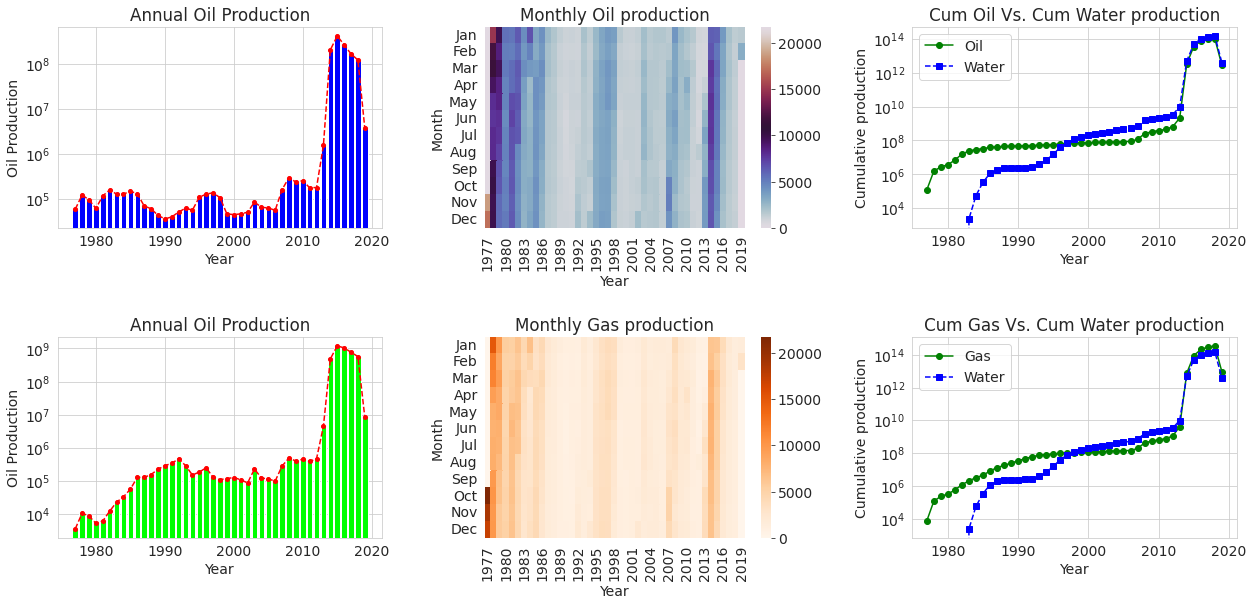

In [ ]:
#combine all the graph in a single plot

fig, ax =plt.subplots(2,3, figsize=(18,9)) #create a figure with 2 rows and 3 columns of subplots

#Annual Oil Production
ax[0,0].bar(annual_df.index, annual_df.Liquid, color='blue')
ax[0,0].plot(annual_df.index, annual_df.Liquid, marker='.', ms=8, ls='--', c='red')
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Oil Production')
ax[0,0].set_title('Annual Oil Production')

#Annual Gas Production
ax[1,0].bar(annual_df.index, annual_df.Gas, color='lime')
ax[1,0].plot(annual_df.index, annual_df.Gas, marker='.', ms=8, ls='--', c='red')
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Oil Production')
ax[1,0].set_title('Annual Oil Production')

#Monthly Oil Production
ax[0,1].set_title('Monthly Oil production')
sns.heatmap(monthly_oil_df, cmap='twilight', ax=ax[0,1])

#Monthly Gas Production
ax[1,1].set_title('Monthly Gas production')
sns.heatmap(monthly_oil_df, cmap='Oranges', ax=ax[1,1])

#Cum Oil Vs. Cum Water
ax[0, 2].plot(annual_df.index, annual_df.Cum_Oil, 'o-g')
ax[0, 2].plot(annual_df.index, annual_df.Cum_Water, 's--b')
ax[0,2].set_yscale('log')
ax[0, 2].set_xlabel('Year')
ax[0, 2].set_ylabel('Cumulative production')
ax[0, 2].set_title('Cum Oil Vs. Cum Water production')
ax[0, 2].legend(['Oil', 'Water'])

#Cum Gas Vs. Cum Water
ax[1, 2].plot(annual_df.index, annual_df.Cum_Gas, 'o-g')
ax[1, 2].plot(annual_df.index, annual_df.Cum_Water, 's--b')
ax[1,2].set_yscale('log')
ax[1, 2].set_xlabel('Year')
ax[1, 2].set_ylabel('Cumulative production')
ax[1, 2].set_title('Cum Gas Vs. Cum Water production')
ax[1, 2].legend(['Gas', 'Water'])

plt.tight_layout(pad=2)


In [ ]:
API_Tot_Liq_Prod = Sort.pivot_table('Liquid', 'API', 'Year', sort = False)

API_Tot_Liq_Prod

Year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
API,,,,,,,,,,,,,,,,,,,,,
42371323150300,19226.333333,10005.5,7778.25,5028.25,6272.083333,6116.666667,1225.500000,13.583333,935.166667,389.750000,...,1257.833333,434.583333,504.000000,683.500000,1530.333333,447.666667,892.583333,1196.583333,231.000000,NaN
42371334530200,NaN,NaN,NaN,NaN,6557.166667,6464.000000,8513.333333,6613.500000,5176.166667,3899.583333,...,1602.916667,1215.666667,701.000000,378.000000,114.500000,216.583333,172.750000,216.750000,2093.000000,NaN
42371337890300,NaN,NaN,NaN,NaN,NaN,1010.000000,708.833333,3862.083333,6022.583333,6406.666667,...,587.416667,425.916667,356.333333,386.000000,1272.416667,3114.666667,0.000000,0.000000,966.333333,NaN
33025006260100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1463.916667,1215.666667,1059.083333,956.083333,889.000000,6919.083333,6032.750000,4575.083333,3118.333333,3143.0
33025006080100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1088.583333,967.583333,686.333333,691.500000,647.000000,3962.750000,5139.000000,3265.416667,1896.750000,2178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42495317050100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6561.000000,3467.583333,1348.230769,1005.833333,NaN
42389348680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22935.600000,9824.250000,5501.916667,1370.333333,NaN
42389348690000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16845.800000,4026.583333,2621.000000,1492.583333,NaN


In [ ]:
API_Tot_Liq_Prod.fillna(0, inplace=True)

API_Tot_Liq_Prod 

Year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
API,,,,,,,,,,,,,,,,,,,,,
42371323150300,19226.333333,10005.5,7778.25,5028.25,6272.083333,6116.666667,1225.500000,13.583333,935.166667,389.750000,...,1257.833333,434.583333,504.000000,683.500000,1530.333333,447.666667,892.583333,1196.583333,231.000000,0.0
42371334530200,0.000000,0.0,0.00,0.00,6557.166667,6464.000000,8513.333333,6613.500000,5176.166667,3899.583333,...,1602.916667,1215.666667,701.000000,378.000000,114.500000,216.583333,172.750000,216.750000,2093.000000,0.0
42371337890300,0.000000,0.0,0.00,0.00,0.000000,1010.000000,708.833333,3862.083333,6022.583333,6406.666667,...,587.416667,425.916667,356.333333,386.000000,1272.416667,3114.666667,0.000000,0.000000,966.333333,0.0
33025006260100,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1463.916667,1215.666667,1059.083333,956.083333,889.000000,6919.083333,6032.750000,4575.083333,3118.333333,3143.0
33025006080100,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1088.583333,967.583333,686.333333,691.500000,647.000000,3962.750000,5139.000000,3265.416667,1896.750000,2178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42495317050100,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6561.000000,3467.583333,1348.230769,1005.833333,0.0
42389348680000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,22935.600000,9824.250000,5501.916667,1370.333333,0.0
42389348690000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,16845.800000,4026.583333,2621.000000,1492.583333,0.0


In [ ]:
API_Tot_Gas_Prod = Sort.pivot_table('Gas', 'API', 'Year', sort = False)

API_Tot_Gas_Prod

Year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
API,,,,,,,,,,,,,,,,,,,,,
42371323150300,1183.666667,881.25,723.083333,436.25,293.416667,727.333333,1511.250000,134.166667,2501.833333,2924.750000,...,10608.916667,6722.583333,6908.250000,7911.916667,5851.500000,2488.916667,1908.000000,1947.083333,786.916667,NaN
42371334530200,NaN,NaN,NaN,NaN,442.000000,290.250000,347.416667,657.000000,687.166667,2882.750000,...,10543.000000,10583.250000,6540.500000,2581.583333,390.750000,976.000000,955.750000,3693.916667,5503.250000,NaN
42371337890300,NaN,NaN,NaN,NaN,NaN,0.000000,47.333333,1960.583333,1503.250000,4841.916667,...,2200.500000,1547.083333,1716.666667,2551.000000,16995.916667,38615.083333,0.000000,0.000000,7483.416667,NaN
33025006260100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1245.000000,1091.583333,977.666667,910.083333,845.583333,5480.666667,4931.000000,5002.750000,2877.666667,2217.0
33025006080100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,840.750000,753.750000,512.583333,523.750000,439.083333,2162.333333,3700.833333,4313.583333,1963.583333,2391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42495317050100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36537.200000,28463.166667,5971.384615,2818.083333,NaN
42389348680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,101652.200000,45271.333333,28294.250000,11762.500000,NaN
42389348690000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,72174.600000,16189.583333,17192.833333,9998.250000,NaN


In [ ]:
API_Tot_Gas_Prod.fillna(0, inplace=True)

API_Tot_Gas_Prod

Year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
API,,,,,,,,,,,,,,,,,,,,,
42371323150300,1183.666667,881.25,723.083333,436.25,293.416667,727.333333,1511.250000,134.166667,2501.833333,2924.750000,...,10608.916667,6722.583333,6908.250000,7911.916667,5851.500000,2488.916667,1908.000000,1947.083333,786.916667,0.0
42371334530200,0.000000,0.00,0.000000,0.00,442.000000,290.250000,347.416667,657.000000,687.166667,2882.750000,...,10543.000000,10583.250000,6540.500000,2581.583333,390.750000,976.000000,955.750000,3693.916667,5503.250000,0.0
42371337890300,0.000000,0.00,0.000000,0.00,0.000000,0.000000,47.333333,1960.583333,1503.250000,4841.916667,...,2200.500000,1547.083333,1716.666667,2551.000000,16995.916667,38615.083333,0.000000,0.000000,7483.416667,0.0
33025006260100,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1245.000000,1091.583333,977.666667,910.083333,845.583333,5480.666667,4931.000000,5002.750000,2877.666667,2217.0
33025006080100,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,840.750000,753.750000,512.583333,523.750000,439.083333,2162.333333,3700.833333,4313.583333,1963.583333,2391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42495317050100,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,36537.200000,28463.166667,5971.384615,2818.083333,0.0
42389348680000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,101652.200000,45271.333333,28294.250000,11762.500000,0.0
42389348690000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,72174.600000,16189.583333,17192.833333,9998.250000,0.0


In [ ]:
API_Tot_Water_Prod = Sort.pivot_table('Water', 'API', 'Year', sort=False)

API_Tot_Water_Prod

Year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
API,,,,,,,,,,,,,,,,,,,,,
42371323150300,0.0,0.0,0.0,0.0,0.0,0.0,15.833333,0.000000,23.916667,7.500000,...,5450.583333,714.666667,6.583333,497.666667,11187.666667,21519.000000,18305.750000,12492.583333,11000.416667,NaN
42371334530200,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,238.583333,36.666667,0.000000,...,38626.083333,21239.083333,5307.833333,9758.750000,8179.333333,23538.916667,23635.083333,15210.083333,16504.916667,NaN
42371337890300,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,1314.333333,1885.583333,...,1329.333333,110.666667,15.083333,13.666667,2.166667,0.000000,0.000000,0.000000,5333.833333,NaN
33025006260100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,331.166667,280.166667,244.416667,338.083333,212.000000,4181.666667,3049.250000,2167.750000,1987.833333,2720.0
33025006080100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,207.916667,203.666667,162.250000,155.250000,122.166667,2981.250000,2769.250000,1912.750000,1216.750000,1653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42495317050100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,958.083333,4093.230769,1931.833333,NaN
42389348680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,94981.000000,43688.083333,27304.750000,11351.083333,NaN
42389348690000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,71909.800000,16951.416667,18001.833333,10468.666667,NaN


In [ ]:
API_Tot_Water_Prod.fillna(0, inplace=True)

API_Tot_Water_Prod

Year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
API,,,,,,,,,,,,,,,,,,,,,
42371323150300,0.0,0.0,0.0,0.0,0.0,0.0,15.833333,0.000000,23.916667,7.500000,...,5450.583333,714.666667,6.583333,497.666667,11187.666667,21519.000000,18305.750000,12492.583333,11000.416667,0.0
42371334530200,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,238.583333,36.666667,0.000000,...,38626.083333,21239.083333,5307.833333,9758.750000,8179.333333,23538.916667,23635.083333,15210.083333,16504.916667,0.0
42371337890300,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1314.333333,1885.583333,...,1329.333333,110.666667,15.083333,13.666667,2.166667,0.000000,0.000000,0.000000,5333.833333,0.0
33025006260100,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,331.166667,280.166667,244.416667,338.083333,212.000000,4181.666667,3049.250000,2167.750000,1987.833333,2720.0
33025006080100,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,207.916667,203.666667,162.250000,155.250000,122.166667,2981.250000,2769.250000,1912.750000,1216.750000,1653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42495317050100,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,958.083333,4093.230769,1931.833333,0.0
42389348680000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,94981.000000,43688.083333,27304.750000,11351.083333,0.0
42389348690000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,71909.800000,16951.416667,18001.833333,10468.666667,0.0


KeyError: ignored